In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from acquire import acquire_stores
import acquire
import prepare
import wrangle
import requests
import env
import os

In [2]:
#acquiring superstore data from the csv file 
df = wrangle.get_superstore()

In [3]:
#displaying first 5 rows
df.head()

,Region ID,Product ID,Category ID,Customer ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Customer Name,Category,Sub-Category,Product Name,Region Name
0,1,FUR-BO-10001798,1,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,261.9600,2.0,0.00,41.9136,Claire Gute,Furniture,Bookcases,Bush Somerset Collection Bookcase,South
1,1,FUR-CH-10000454,2,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,731.9400,3.0,0.00,219.5820,Claire Gute,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South
2,1,FUR-TA-10000577,4,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,957.5775,5.0,0.45,-383.0310,Sean O'Donnell,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,South
3,1,OFF-ST-10000760,5,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,22.3680,2.0,0.20,2.5164,Sean O'Donnell,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,South
4,1,OFF-PA-10002365,11,AA-10480,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,...,28027.0,15.5520,3.0,0.20,5.4432,Andrew Allen,Office Supplies,Paper,Xerox 1967,South


In [4]:
#checking the number of rows and columns
df.shape

(1734, 22)

In [5]:
#checking the dataframe nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region ID      1734 non-null   int64  
 1   Product ID     1734 non-null   object 
 2   Category ID    1734 non-null   int64  
 3   Customer ID    1734 non-null   object 
 4   Order ID       1734 non-null   object 
 5   Order Date     1734 non-null   object 
 6   Ship Date      1734 non-null   object 
 7   Ship Mode      1734 non-null   object 
 8   Segment        1734 non-null   object 
 9   Country        1734 non-null   object 
 10  City           1734 non-null   object 
 11  State          1734 non-null   object 
 12  Postal Code    1734 non-null   float64
 13  Sales          1734 non-null   float64
 14  Quantity       1734 non-null   float64
 15  Discount       1734 non-null   float64
 16  Profit         1734 non-null   float64
 17  Customer Name  1734 non-null   object 
 18  Category

In [6]:
#checking the nulls
df.isnull().sum()

Region ID        0
Product ID       0
Category ID      0
Customer ID      0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Sales            0
Quantity         0
Discount         0
Profit           0
Customer Name    0
Category         0
Sub-Category     0
Product Name     0
Region Name      0
dtype: int64

In [7]:
#getting and displaying df after making changes
df = wrangle.superstore(df)
df

,region_id,product_id,category_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,...,postal_code,sales,quantity,discount,profit,customer_name,category,sub-category,product_name,region_name
0,1,FUR-BO-10001798,1,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,261.9600,2.0,0.00,41.9136,Claire Gute,Furniture,Bookcases,Bush Somerset Collection Bookcase,South
1,1,FUR-CH-10000454,2,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,731.9400,3.0,0.00,219.5820,Claire Gute,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South
2,1,FUR-TA-10000577,4,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,957.5775,5.0,0.45,-383.0310,Sean O'Donnell,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,South
3,1,OFF-ST-10000760,5,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,22.3680,2.0,0.20,2.5164,Sean O'Donnell,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,South
4,1,OFF-PA-10002365,11,AA-10480,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,...,28027.0,15.5520,3.0,0.20,5.4432,Andrew Allen,Office Supplies,Paper,Xerox 1967,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,4,OFF-BI-10002824,9,BN-11515,CA-2016-169943,2016-05-19,2016-05-24,Standard Class,Consumer,United States,...,10011.0,47.7440,4.0,0.20,14.9200,Bradley Nguyen,Office Supplies,Binders,Recycled Easel Ring Binders,East
1730,4,OFF-AP-10000828,10,JK-15370,CA-2015-127453,2015-12-19,2015-12-20,First Class,Consumer,United States,...,19143.0,434.3520,3.0,0.20,43.4352,Jay Kimmel,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,East
1731,4,OFF-AP-10002906,10,JK-15370,CA-2015-127453,2015-12-19,2015-12-20,First Class,Consumer,United States,...,19143.0,3.5520,2.0,0.20,0.4440,Jay Kimmel,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,East
1732,4,OFF-AP-10003860,10,JK-15370,CA-2015-127453,2015-12-19,2015-12-20,First Class,Consumer,United States,...,19143.0,88.8320,4.0,0.20,7.7728,Jay Kimmel,Office Supplies,Appliances,Fellowes Advanced 8 Outlet Surge Suppressor wi...,East


In [11]:
#split data and check shape
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.25, random_state=123)
train.shape, validate.shape, test.shape

((1040, 22), (347, 22), (347, 22))

<AxesSubplot:xlabel='region_name'>

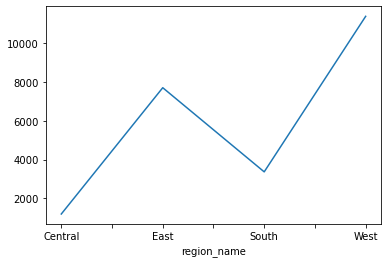

In [12]:
train.groupby("region_name").profit.sum().plot()